In [1]:
import librosa
import librosa.display
import scipy as sp
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# load audio file 
audio_path = '/Users/kristineumeh/Desktop/projects/MIR/AudioSignalProcessing/piano_c.wav'
ipd.Audio(audio_path)

In [31]:
# load file

signal, sr = librosa.load(audio_path)
sr

22050

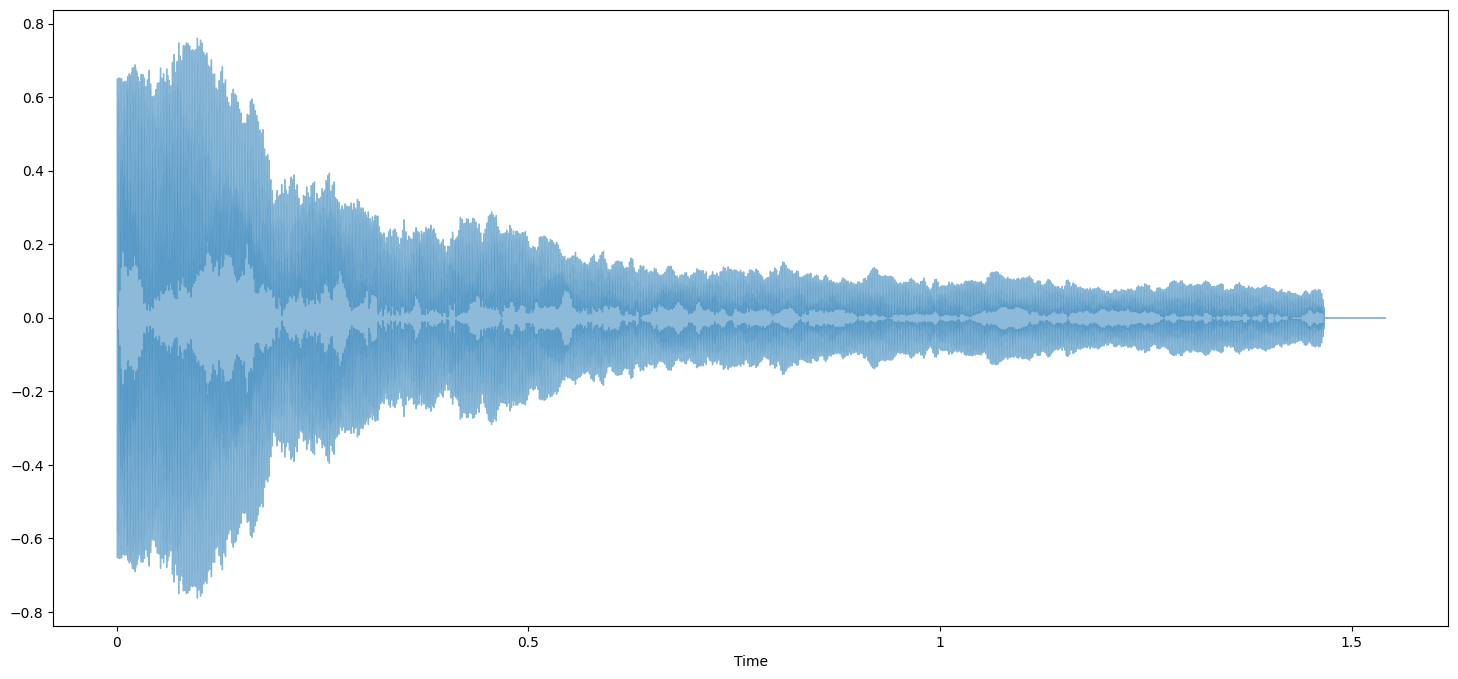

In [8]:
plt.figure(figsize=(18,8))
librosa.display.waveshow(signal, sr=sr, alpha=0.5)
plt.show()

In [46]:
# derive spectrum using FT
ft = sp.fft.fft(signal)
magnitude = np.absolute(ft) # y axis
frequency = np.linspace(0, sr, len(magnitude)) # x axis

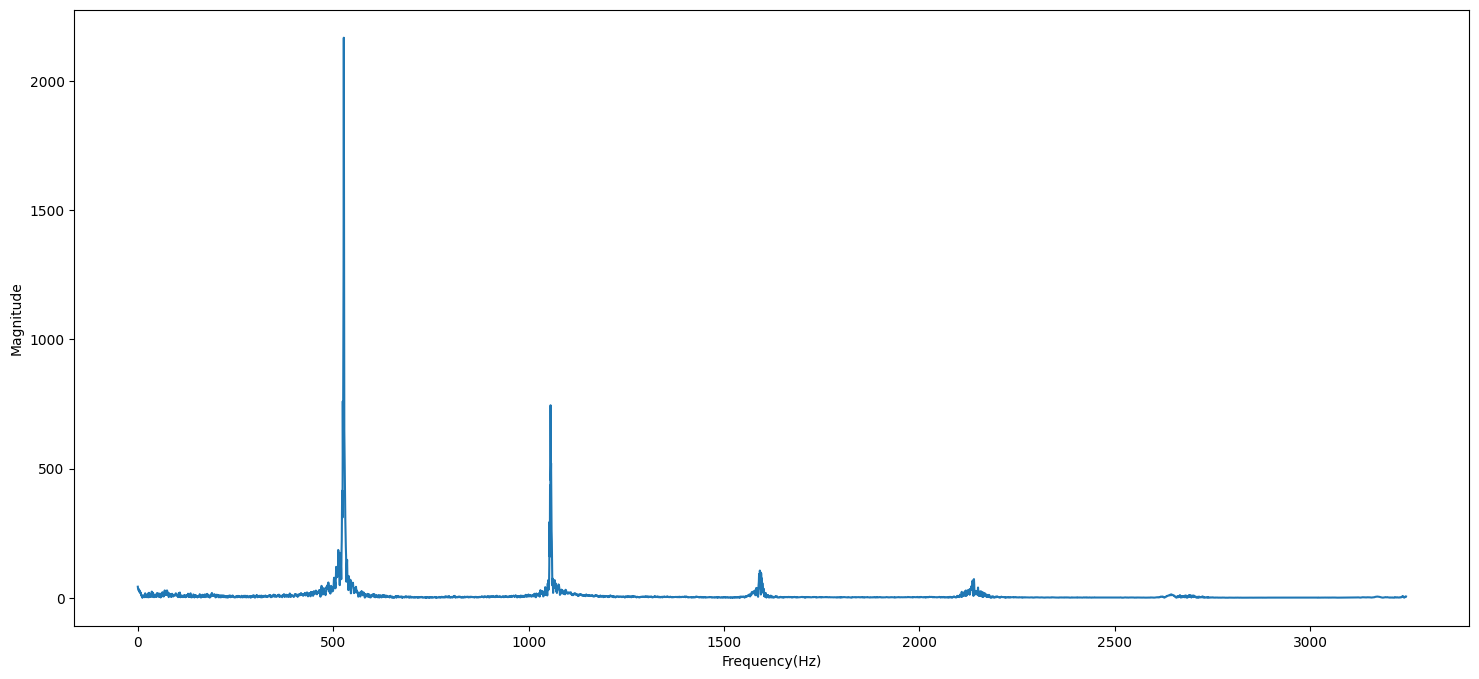

In [47]:
# plot the spectrum
plt.figure(figsize=(18,8))
plt.plot(frequency[:5000], magnitude[:5000]) # magnitude soecturm
plt.xlabel("Frequency(Hz)")
plt.ylabel("Magnitude")
plt.show()

# the resultant peaks are overtones

In [48]:
len(signal)

33968

In [49]:
d = 1 / sr
d

4.5351473922902495e-05

In [50]:
d_523 = 1 / 523
d_523

0.0019120458891013384

In [51]:
d_400_samples = 400 * d
d_400_samples

0.018140589569160998

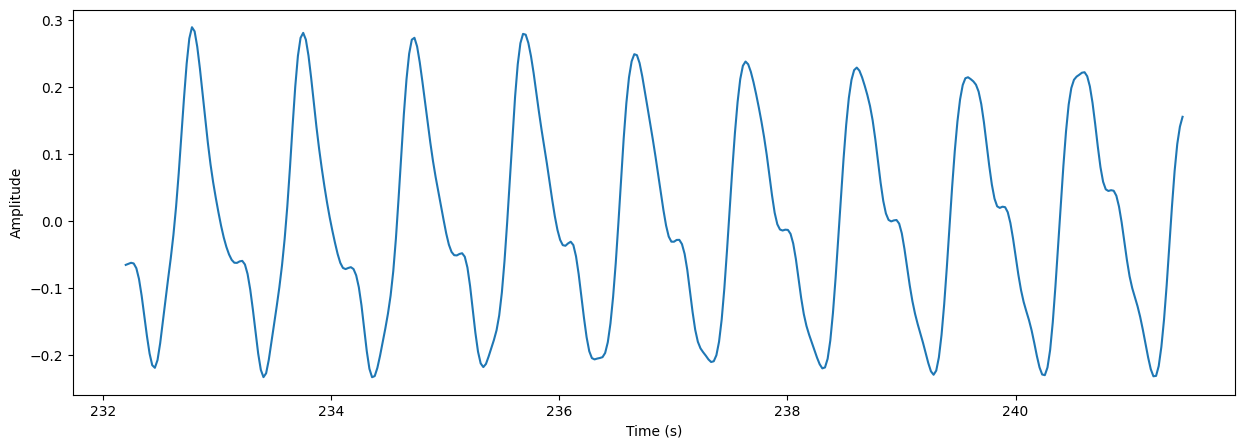

In [64]:
# zoom into waveform

samples = range(len(signal))
t = librosa.frames_to_time(samples, sr=sr)

plt.figure(figsize=(15,5))
plt.plot(t[10000:10400], signal[10000:10400])
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.show()

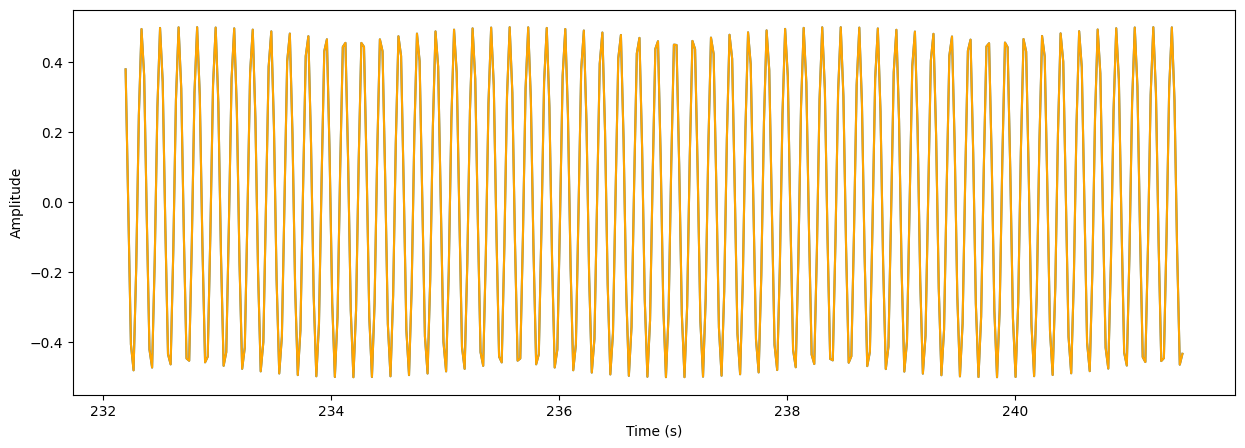

In [70]:
# create a sinusoid

f = 523
phase = 0
phase2 = 2

sin = 0.5 * np.sin(2 * np.pi * (f * t - phase))
sin2 = 0.5 * np.sin(2 * np.pi * (f * t - phase2))

plt.figure(figsize=(15,5))
plt.plot(t[10000:10400], sin[10000:10400])
plt.plot(t[10000:10400], sin2[10000:10400], color="orange")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.show()

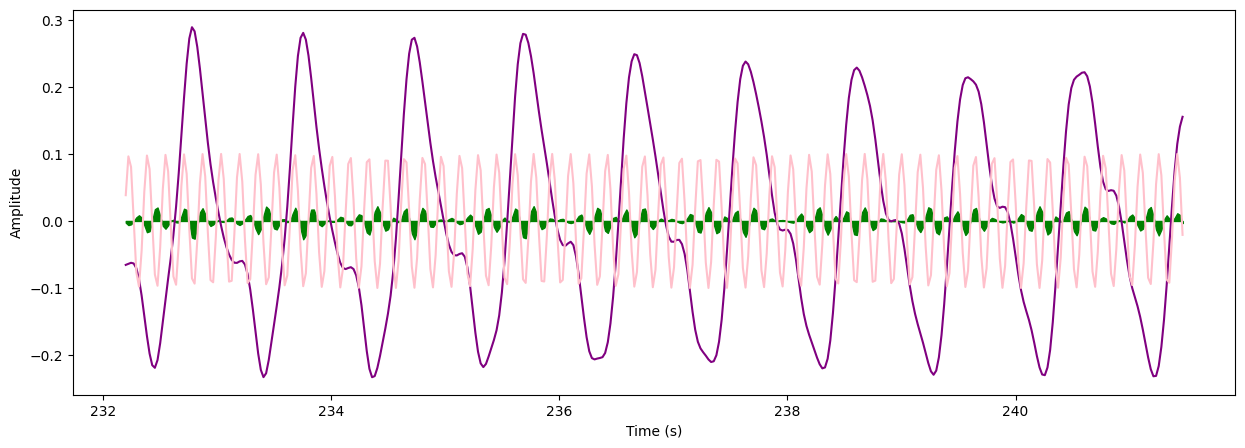

In [71]:
# compare signals and sinusoids

f = 523
phase = 0.3

sin = 0.1 * np.sin(2 * np.pi * (f * t - phase))

plt.figure(figsize=(15,5))
plt.plot(t[10000:10400], signal[10000:10400], color="purple")
plt.plot(t[10000:10400], sin[10000:10400], color="pink")

plt.fill_between(t[10000:10400], sin[10000:10400] * signal[10000:10400], color="green")

plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.show()

Text(0, 0.5, 'Magnitude')

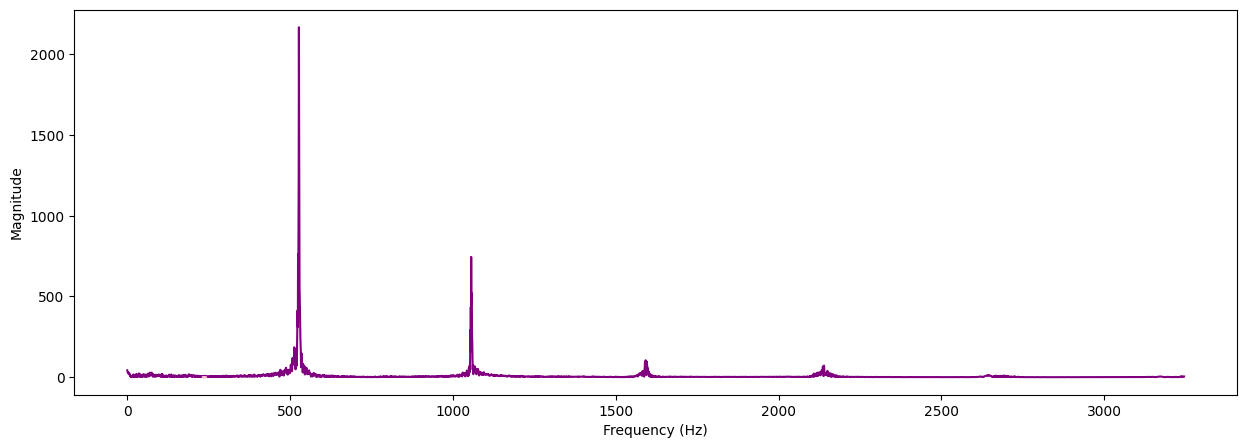

In [72]:
# plot spectrum

plt.figure(figsize=(15,5))
plt.plot(frequency[:5000], magnitude[:5000], color="purple")
plt.plot(t[10000:10400], sin[10000:10400], color="pink")
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')